In [83]:
import networkx as nx
import plotly.graph_objs as go
import json

In [84]:
filepath = 'data/covid_data.json'
MeSHterm = {}
with open(filepath) as file:
    jsondata = json.loads(file.read())
    for article in jsondata:
        if len(article['MeSHterm']) != 0:
            for terms in article['MeSHterm']:
                if terms not in MeSHterm:
                    MeSHterm[terms] = 1
                else:
                    MeSHterm[terms] += article['MeSHterm'][terms]         

In [85]:
sorted_MeSHterm = sorted(MeSHterm.items(), key=lambda x: x[1], reverse=True)
print(sorted_MeSHterm[:10])
covid_list = sorted_MeSHterm[:10]

[('Humans', 1523), ('COVID-19', 1521), ('epidemiology', 1471), ('Pandemics', 783), ('SARS-CoV-2', 522), ('prevention & control', 444), ('Female', 297), ('Male', 219), ('Cross-Sectional Studies', 207), ('diagnosis', 185)]


In [13]:
filepath = 'data/depression_data.json'
MeSHterm = {}
with open(filepath) as file:
    jsondata = json.loads(file.read())
    for article in jsondata:
        if len(article['MeSHterm']) != 0:
            for terms in article['MeSHterm']:
                if terms not in MeSHterm:
                    MeSHterm[terms] = 1
                else:
                    MeSHterm[terms] += article['MeSHterm'][terms]      

In [86]:
sorted_MeSHterm = sorted(MeSHterm.items(), key=lambda x: x[1], reverse=True)
print(sorted_MeSHterm[:10])
def get_value(sort_list, key):
    return [v for k, v in sorted_MeSHterm if key == k]
    
def get_index(sort_list, key):
    for i, item in enumerate(sort_list):
        if item[0] == key:
            return i

value = get_value(sorted_MeSHterm, 'Depression')
index = get_index(sorted_MeSHterm, 'Depression')
print(value)
print(index)

[('Humans', 1523), ('COVID-19', 1521), ('epidemiology', 1471), ('Pandemics', 783), ('SARS-CoV-2', 522), ('prevention & control', 444), ('Female', 297), ('Male', 219), ('Cross-Sectional Studies', 207), ('diagnosis', 185)]
[38]
42


In [55]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import io

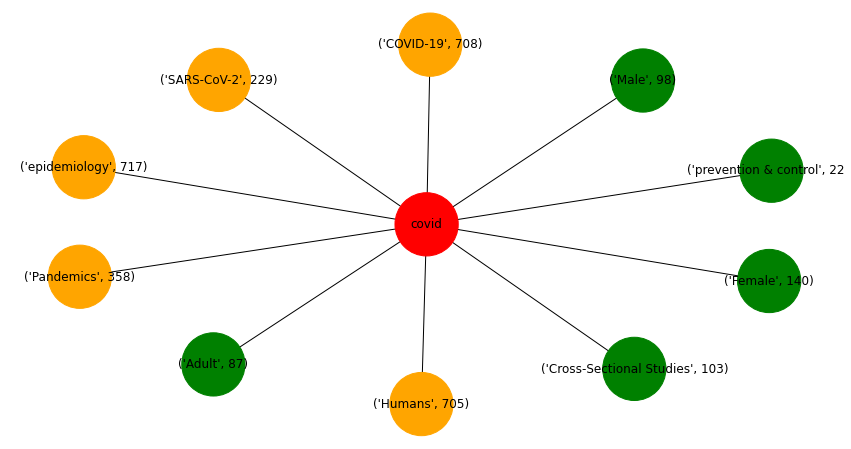

In [60]:
fig, ax = plt.subplots(figsize=(15, 8))

key_word = 'covid'
relationships = pd.DataFrame({'from': [key_word, key_word, key_word, key_word, key_word, key_word, key_word, key_word, key_word, key_word], 
            'to':   covid_list})

# Create DF for node characteristics
carac = pd.DataFrame({'ID':[key_word, covid_list[0], covid_list[1], covid_list[2], covid_list[3], covid_list[4], covid_list[5], covid_list[6], covid_list[7], covid_list[8], covid_list[9]], 
            'type':['points', 'letter', 'letter', 'letter', 'letter', 'letter', 'Letter', 'Letter', 'Letter', 'Letter', 'Letter']})

# Create graph object
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

# Make types into categories
carac = carac.set_index('ID')
carac = carac.reindex(G.nodes())

carac['type'] = pd.Categorical(carac['type'])
carac['type'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['green', 'darkorange', 'orange', 'red'])

# Set node sizes
node_sizes = 4000
nx.draw(G, with_labels=True, node_color=carac['type'].cat.codes, cmap=cmap, 
        node_size=node_sizes)
plt.savefig('../media/covid_MeSHTerm.png')
plt.show()